<b>Group 30</b> <br>
Abhishek Dask - A0200549L <br>
Shreyas Kumar - A0208043R <br>
Poon Chuan An - A0210750W

### Importing Necessary Libraries

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import pickle as pkl
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Python packages and versions used

In [2]:
!python --version

Python 3.8.13


In [3]:
pip list

Package                       Version
----------------------------- -----------
absl-py                       1.2.0
aiohttp                       3.8.1
aiosignal                     1.2.0
appnope                       0.1.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.0.8
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         22.1.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.11.1
bleach                        5.0.1
blinker                       1.4
brotlipy                      0.7.0
cached-property               1.5.2
cachetools                    5.2.0
certifi                       2022.9.24
cffi                          1.15.1
charset-normalizer            2.1.1
click                         8.1.3
click-plugins                 1.1.1
cligj                         0.7.2
contourpy                     1.0.5
cryptography 

# Problem Statement
Since the holiday season (June and December) is coming up, people will want to spend time with friends and family, so our aim is too provide a solution for whether an individual will be comfortable with taking their own private transport or will be more time efficient to take public transport. The goal of is that the user provides the destination location (carpark) and a particular date and time during the holiday season to find out if they should drive or take public transport instead based on the carpark availability which we will be predicting.

### The first part of application - Regression Problem:
1. Make use of past data from previous months so as to predict the availabilty at a given day and a given time. 
1. This will be our regression problem. 

### Second Part of the application - Classification Problem: 
1. This part of the application will be a classification problem. i.e whether an individual will take public transport or private transport.
1. These will be elaborated in the further sections.
1. Our classes is as follows: 
    * Public Transport
    * Private Transport    
1. Potential Issues Faced: 
    * Real life changes to carpark spaces by HDB. Shutdown, creation of carpark or expansion of carpark occupancy will be inevitable. As such, we made use of data that are as recent as possible. However, the accuracy of this project may decrease over time as housing developments are made. Nonetheless, we believe this project will still retain some value as the social factors will not change, and the parking patterns during holidays will remain the same.
    * Dataset only restricted to HDBs. There are many carparks in commercial areas as well, such as shopping malls. However, for this problem statement, we will only be focusing on the HBD residential carparks as they are the most frequently accesed and utilised by majority of the people in Singapore.


### Importing Additional Datasets 

The purpose of the <b>hdb carpark dataset</b> is to obtain the addresses of the of hdb locations and their associated carparks so that we can perform an inner join while generating the classifier data later. It also provides us with the necessary location coordinates which helps us determine the closest mrt to the destination location if the user is requierd to take public transport.

In [31]:
hdb_carparks = pd.read_csv('./Datasets/hdb-carpark-information/hdb-carpark-information.csv')
hdb_carparks.rename(columns={"car_park_no": "carpark_number"}, inplace=True)
hdb_carparks 

,carpark_number,address,x_coord,y_coord,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement,lat,lng
0,ACB,BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK,30314.7936,31490.4942,BASEMENT CAR PARK,ELECTRONIC PARKING,WHOLE DAY,NO,YES,1,1.80,Y,1.301063,103.854118
1,ACM,BLK 98A ALJUNIED CRESCENT,33758.4143,33695.5198,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,5,2.10,N,1.321004,103.885061
2,AH1,BLK 101 JALAN DUSUN,29257.7203,34500.3599,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,0.00,N,1.328283,103.844620
3,AK19,BLOCK 253 ANG MO KIO STREET 21,28185.4359,39012.6664,SURFACE CAR PARK,COUPON PARKING,7AM-7PM,NO,NO,0,0.00,N,1.369091,103.834985
4,AK31,BLK 302/348 ANG MO KIO ST 31,29482.0290,38684.1754,SURFACE CAR PARK,COUPON PARKING,NO,NO,NO,0,0.00,N,1.366120,103.846636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,Y77M,BLK 461 YISHUN AVENUE 6,29850.1522,45576.0125,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,10,2.15,N,1.428448,103.849944
2178,Y78M,BLK 468 YISHUN ST 43,30057.2209,45166.4820,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,4,2.15,N,1.424744,103.851805
2179,Y8,"BLK 731/746 YISHUN STREET 71,72/AVENUE 5",27772.9219,45686.2734,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0,4.50,N,1.429445,103.831278
2180,Y82M,BLK 478 YISHUN ST 42,29935.5818,45679.7181,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,11,2.15,N,1.429386,103.850712


The purpose of the <b>hdb blocks dataset</b> is to obtain the exact location of the HDB blocks of Singapore, to be used in data visualisation.

In [34]:
hdb_blocks = pd.read_csv("./Datasets/housing_and_transport_data/hdb_blocks_db.csv")
hdb_blocks

,id,number,street,postal_code,completed,max_floor,lat,lng,subzone
0,0,1,beach rd,190001,1970,16,1.303671,103.864479,crawford
1,1,1,bedok sth ave 1,469335,1975,14,1.322286,103.932474,bedok south
2,2,1,chai chee rd,461001,1982,15,1.327969,103.922716,kembangan
3,3,1,changi village rd,500001,1975,4,1.388547,103.987804,changi point
4,4,1,delta ave,160001,1982,25,1.292075,103.828584,bukit ho swee
...,...,...,...,...,...,...,...,...,...
10121,10133,997c,buangkok cres,530997,2017,16,1.385443,103.880763,trafalgar
10122,10134,998a,buangkok cres,530998,2018,18,1.384218,103.879656,trafalgar
10123,10135,998b,buangkok cres,530998,2018,17,1.384218,103.879656,trafalgar
10124,10136,999a,buangkok cres,530999,2018,18,1.384564,103.879946,trafalgar


The purpose of the mrt station dataset is to obtain the mrt station names and their location coordinates of the station so as to determine the closest mrt to the hdb while generating the classification data.

In [6]:
mrt_stations = pd.read_csv('./Datasets/housing_and_transport_data/mrtsg.csv')
mrt_stations.drop(mrt_stations.iloc[:, 7:], axis = 1, inplace=True)
mrt_stations

,OBJECTID,STN_NAME,STN_NO,X,Y,Latitude,Longitude
0,12,ADMIRALTY MRT STATION,NS10,24402.1063,46918.1131,1.440585,103.800998
1,16,ALJUNIED MRT STATION,EW9,33518.6049,33190.0020,1.316433,103.882893
2,33,ANG MO KIO MRT STATION,NS16,29807.2655,39105.7720,1.369933,103.849553
3,81,BAKAU LRT STATION,SE3,36026.0821,41113.8766,1.388093,103.905418
4,80,BANGKIT LRT STATION,BP9,21248.2460,40220.9693,1.380018,103.772667
...,...,...,...,...,...,...,...
184,175,WOODLANDS SOUTH MRT STATION,TE3,23607.8309,45444.7113,1.427260,103.793863
185,146,WOODLEIGH MRT STATION,NE11,32173.3186,35706.3794,1.339190,103.870808
186,6,YEW TEE MRT STATION,NS5,18438.9791,42158.0124,1.397535,103.747431
187,41,YIO CHU KANG MRT STATION,NS15,29294.1283,40413.0820,1.381756,103.844944


### Necessary Function Definitions for Processing Classification Data

The euclidean_distance and the closest mrt function are functions used to determine the closest mrt to a hdb carpark which is useful information if the user is required to take public transport to reach their respective destination.

In [7]:
def euclidean_distance(p1, p2):
    return math.sqrt((p1['x']-p2['x'])**2 + (p1['y']-p2['y'])**2)

In [8]:
def find_closest_mrt(x_coordinate, y_coordinate):
    calculated_distance = 0
    min_distance = float('inf')
    closest_mrt = ''
    p1 = {'x': x_coordinate, 'y': y_coordinate}
    for index, row in mrt_stations.iterrows():
        p2 = {'x': row["X"], 'y': row["Y"]}
        calculated_distance = euclidean_distance(p1, p2)
        if calculated_distance < min_distance:
            min_distance = calculated_distance
            closest_mrt = row['STN_NAME']
    return closest_mrt

This is the function which we used in the previous questions so as to obtain the carpark availability data for a given month based on the user input. We use this to collect hourly data for a particular month. Each row of the resultant dataframe correspond to a particular carpark, and the columns (hour-day) will indicate the carpark availability data. For example, the "3-19" column indicates the data of that carpark at 3am of the 19th day. 

The data at midnight is omitted as the API does not return any values during this timing. This would not affect our results as it is consistent across all data of all months that we have collected.

In [9]:
def get_data(year,month,day,hour,minute,second):
    year = str(year)
    month = str(month)
    day = str(day)
    hour = str(hour)
    minute = str(minute)
    second = str(second)
    
    site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
    print(site)
    response_API = requests.get(site)
    data = response_API.text
    data = json.loads(data)
    timestamp = data["items"][0]["timestamp"]
    print(timestamp)

    data = data["items"][0]["carpark_data"]
    with open("EE4211data.json", 'w') as fp:
        json.dump(data, fp)
    df = pd.read_json("EE4211data.json")
    for heading in ("total_lots","lot_type","lots_available"):
        df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
    df = df.drop(["carpark_info"], axis=1)
    return df

In [ ]:
# Example of usage. This will take a while to query the API for hourly data for the month.
# Gets hourly carpark data for the month of June 2020

# day = 1
# hour = 2
# first = get_data(2020,6,day,hour-1,0,0)
# first = first[['carpark_number','lots_available']]
# first.rename(columns = {'lots_available':"{0}-{1}".format(hour-1,day)}, inplace = True)
# while day != 30 or hour != 24:
#     try:
#         second = get_data(2020,6,day,hour,0,0)
#         second = second[['carpark_number','lots_available']]
#         second.rename(columns = {'lots_available':"{0}-{1}".format(hour,day)}, inplace = True)
#         second.drop_duplicates(subset="carpark_number",keep=False, inplace=True)
#         first = pd.merge(first, second, on='carpark_number', how='left')
   
#         hour += 1
#         if hour == 24:
#             hour = 1
#             day += 1
#         if day == 31:
#             break
            
#     except KeyError: #api will keep crashing, try again
#         pass
    
# with open('june_2020.json', 'w') as f:
#     f.write(first.to_json(orient='records', lines=True))

The get_sample function is a function used to get a sample point from a particular month so that we can obtain the information on the total number of lots for a particular carpark.

In [10]:
def get_sample(year,month,day,hour,minute,second):
    df = get_data(year,month,day,hour,minute,second)
    df_total = df[['carpark_number', 'total_lots']]
    df_total
    unique_carpark_list = df_total['carpark_number'].unique().tolist()
    results = pd.DataFrame()
    for carpark in unique_carpark_list:
        rows = df.loc[df['carpark_number'] == carpark]
        if len(rows) == 1:
            results = pd.concat([results, rows],ignore_index=True)
        else: #if appear multiple times, means there are different lot types. sum them all up into one
            total_lots = rows['total_lots'].astype(int).sum()
            lots_available = rows['lots_available'].astype(int).sum()
            rows = rows.iloc[:1]
            rows['total_lots'] = total_lots
            rows['lots_available'] = lots_available
            results = pd.concat([results, rows],ignore_index=True)

    return results[['carpark_number', 'total_lots']]


The generate classification training and test to help us model our classifier.

In [11]:
def generate_classification_data(file_loc, sample, isSummer):
    df = pd.read_json(file_loc, lines=True)
    df.fillna(0)
    month_resultant_data = pd.DataFrame()

    for index, row in df.iterrows():
        try:
            carpark_name = row['carpark_number']  
            total_lots = int(sample.loc[sample['carpark_number'] == carpark_name]['total_lots'])
            row = row[1:]/total_lots*100 #calc percentage
            time_percent_df = pd.DataFrame({'timestamp':row.index, 'percentage':row.values}) #df with 2 cols time & percentage
            data = [carpark_name] * len(row)
            temp_df = pd.DataFrame(data, columns=['carpark_number']) # df with carpark name
            temp_result_df = pd.concat([temp_df, time_percent_df], axis=1)
            month_resultant_data = pd.concat([month_resultant_data, temp_result_df],ignore_index=True)
        except ZeroDivisionError: #set to 0 if total lots = 0 - no parking allowed anyway
            row[:] = 0
            time_percent_df = pd.DataFrame({'timestamp':row.index, 'percentage':row.values})
            data = [carpark_name] * len(row)
            temp_df = pd.DataFrame(data, columns=['carpark_number'])
            temp_result_df = pd.concat([temp_df, time_percent_df], axis=1)
            month_resultant_data = pd.concat([month_resultant_data, temp_result_df],ignore_index=True)

    month_resultant_data[['hour', 'day']] = month_resultant_data.timestamp.str.split("-",expand=True,)
    
    result = pd.merge(month_resultant_data, hdb_carparks, how='inner')
    # result 
    result.drop(result.iloc[:, 8:], axis = 1, inplace=True)
    address = result['address']
    result.drop(result.iloc[:, 5:6], axis = 1, inplace=True)
    result['address'] = address
    closest_mrt_list = []
    for index, row in result.iterrows():
        closest_mrt = find_closest_mrt(row["x_coord"], row["y_coord"])
        closest_mrt_list.append(closest_mrt)

    result['closes_mrt'] = closest_mrt_list
    result.drop(['timestamp'], axis = 1, inplace=True)
    
    if isSummer:
        vacation_season = 'summer'
    else:
        vacation_season = 'winter'
    
    result['vacation_season'] = [vacation_season] * len(result)
    result = result.drop(['x_coord', 'y_coord'], axis=1)

    return result

# Data Exploration
First, we do some data exploration to find out understand the dataset better for our problem statement, as well as establish interesting trends and discover parking patterns during the holiday season.

## Data visualisation

### 1. Geographical distribution of HDB carparks, HDB, blocks, and MRT stations.

/Users/shreyaskumar/miniforge3/envs/cs3237_env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


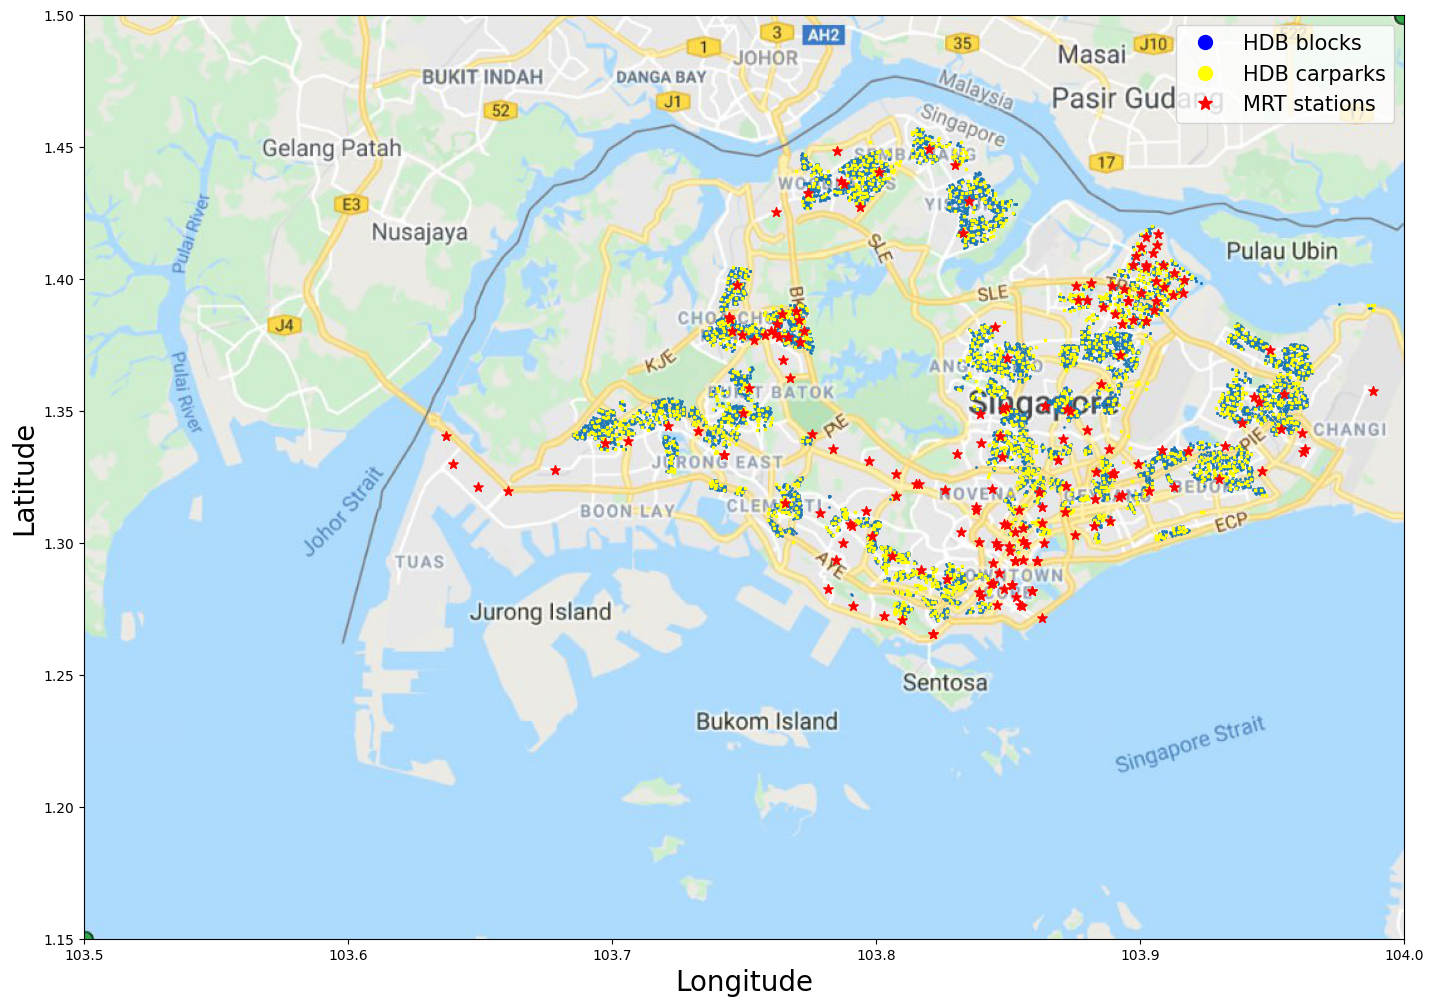

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.lines as mlines

singapore_img = mpimg.imread('sgmap.jpeg')
fig, ax = plt.subplots()
# plot the data
hdb_blocks.plot(
    kind="scatter", 
    x="lng", 
    y="lat", 
    figsize=(18,12),
    marker="o", 
    s=1,
    ax=ax,
)
hdb_carparks.plot(
    kind="scatter", 
    x="lng", 
    y="lat", 
    figsize=(18,12),
    marker=",", 
    s=1,
    color='yellow',
    ax=ax,
)
mrt_stations.plot(
    kind="scatter", 
    x="Longitude", 
    y="Latitude", 
    figsize=(18,12),
    marker="*", 
    s=50,
    color='r',
    ax=ax,
)
# # use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=1)            
# # add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# # set the min/max axis values 
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=10, label='HDB blocks')
yellow_dot = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None',
                          markersize=10, label='HDB carparks')
red_star = mlines.Line2D([], [], color='red', marker='*', linestyle='None',
                          markersize=10, label='MRT stations')

plt.legend(handles=[blue_dot, yellow_dot, red_star],fontsize=15)


plt.show()

From the map, we can tell easily that <u>HBD blocks</u> and <u>HDB carparks</u> are very closely together, which is expected. HBD carparks are usually just right beside HDB blocks in many areas for the residents' convenience due to HDB design planning. We can see that HDB carparks are heavily concentrated in residential areas such as Chua Chu Kang for example, and are non-existent in industrial areas such as Tuas and Changi.

Another interesting point to note is that most of the <u>MRT stations</u>, denoted by the red star, are close to areas with HBD carparks as well. However, there are also some MRT stations that are very far from the carparks. 

This is important in our feature selection process as factors such as population density, accessibility of public transport and location of HDB carparks will play a key role in determining carpark availability. 

### 2. Time Series for December 2021

In [12]:
dec2021 = pd.read_json('./Datasets/carpark_availability_data/dec_2021.json', lines=True)
dec2021

,carpark_number,1-1,2-1,3-1,4-1,5-1,6-1,7-1,8-1,9-1,...,14-31,15-31,16-31,17-31,18-31,19-31,20-31,21-31,22-31,23-31
0,HE12,59,59.0,60.0,56.0,47.0,34.0,0.0,0.0,0.0,...,0.0,0.0,2.0,33.0,25.0,1.0,22.0,15.0,37.0,34.0
1,HLM,490,485.0,483.0,479.0,480.0,477.0,469.0,427.0,381.0,...,55.0,103.0,223.0,265.0,316.0,329.0,325.0,350.0,405.0,453.0
2,RHM,122,121.0,118.0,118.0,116.0,114.0,112.0,129.0,144.0,...,123.0,153.0,167.0,156.0,174.0,159.0,152.0,150.0,158.0,151.0
3,BM29,71,73.0,76.0,76.0,76.0,76.0,74.0,39.0,0.0,...,9.0,0.0,0.0,0.0,16.0,49.0,43.0,57.0,74.0,78.0
4,Q81,72,71.0,72.0,74.0,74.0,72.0,62.0,23.0,9.0,...,0.0,2.0,25.0,25.0,27.0,37.0,34.0,54.0,62.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,B65L,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1953,JB1,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954,BE3,42,39.0,29.0,31.0,31.0,37.0,51.0,72.0,122.0,...,152.0,146.0,149.0,129.0,120.0,121.0,85.0,83.0,65.0,55.0
1955,BE3R,102,99.0,98.0,98.0,97.0,96.0,104.0,110.0,119.0,...,124.0,117.0,123.0,119.0,126.0,124.0,110.0,122.0,118.0,113.0


https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-12-01T01%3A00%3A00
2021-12-01T00:59:26+08:00


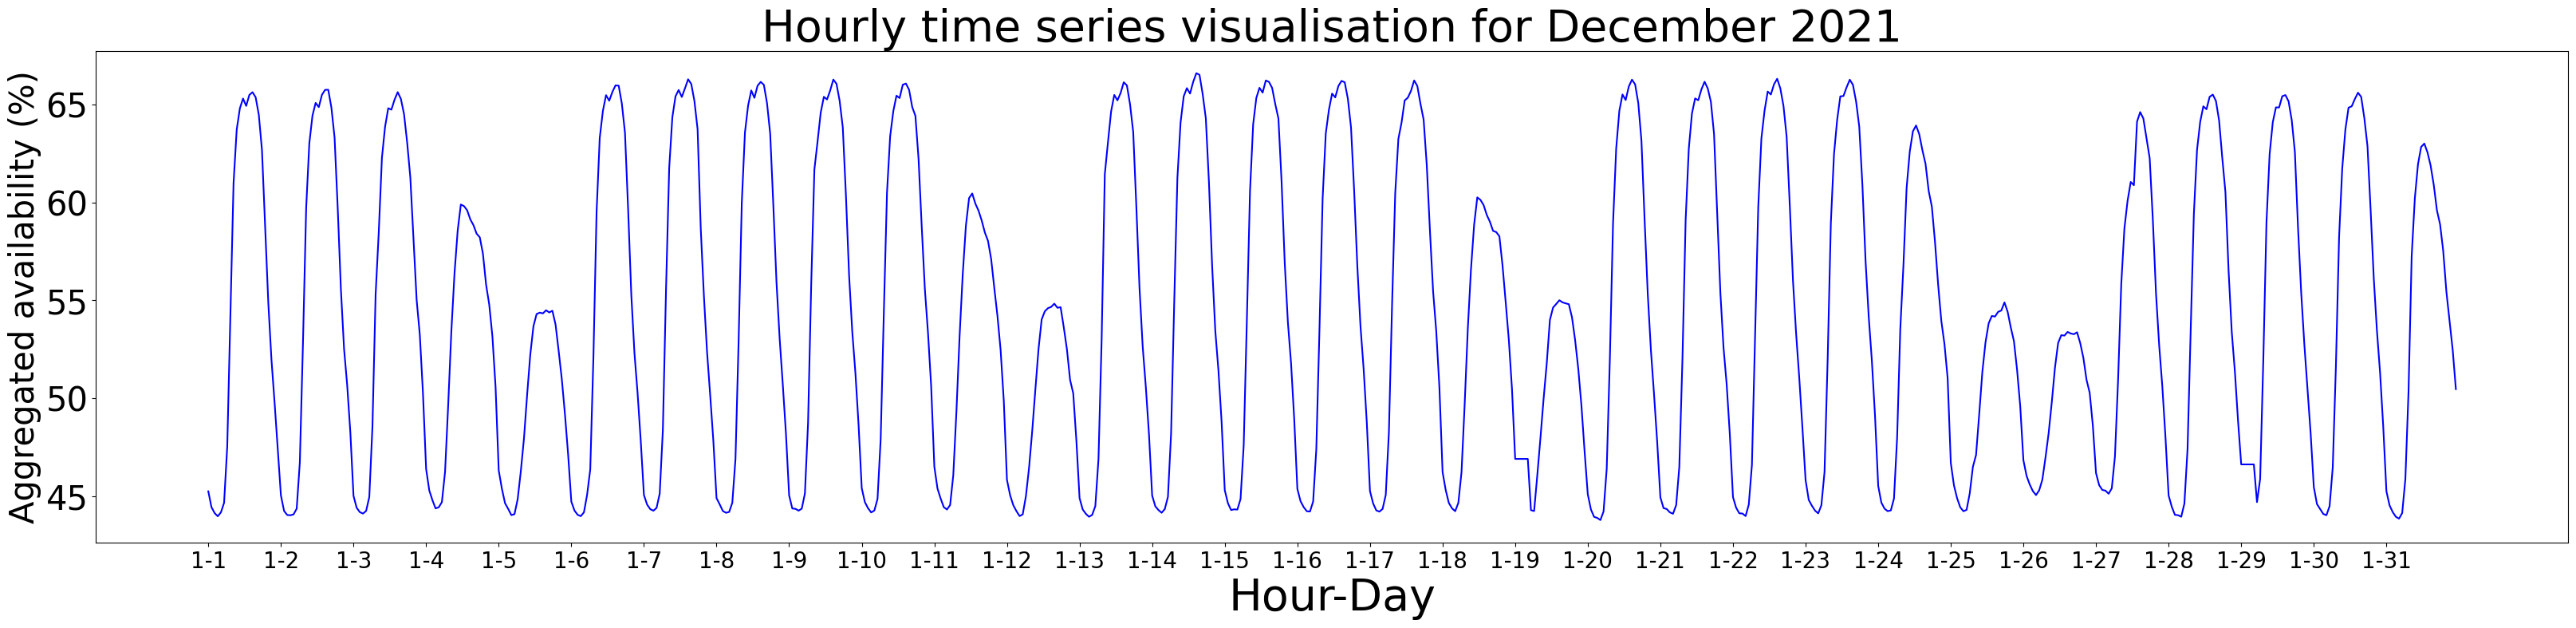

In [13]:
df_total_dec = get_data(2021,12,1,1,0,0)
df_total_dec = df_total_dec[['carpark_number', 'total_lots']]
total_parking_available = df_total_dec.total_lots
total_parking_available = pd.to_numeric(total_parking_available)

results = []
for col in dec2021.columns[1:]:
    percentage_availablity = dec2021[col].sum() / total_parking_available.sum() * 100
    results.append(percentage_availablity)
y = results
x = dec2021.columns[1:].tolist()

new_x = []
for i in range(len(x)):
    new_x.append(i+1)

plt.figure(figsize=(40,8))
plt.plot(x,y,color='b',label='Predicted')
plt.title("Hourly time series visualisation for December 2021", fontdict = {'fontsize' : 40})
plt.xlabel("Hour-Day",fontsize=40)
plt.ylabel("Aggregated availability (%)",fontsize=30)
plt.xticks(x[::23],fontsize=20) #sets interval to daily, and increase fontsize for visibility
plt.yticks(fontsize=30)

plt.show()

Doing the same as Q2, we plotted a time series visualisation for the month of December 2021 to better understand the trends of parking availability during holiday seasons. This is an aggregated percentage of ALL carparks, to generalise the hourly trend for the month. 

As shown, for each week, there is an obvious trend that the carpark availability <b>decreases during the weekends</b> (4-6th). 

Additionally, for each day, carparks availability <b>generally increases and peaks in the middle of the day</b>, which means people usually drive the cars out in the day, and the percentage <b>decreases in the night</b>, when they reach back home and park their vehicles for the night.

# Regression Model Implementation 

Based on our data analysis in Question 2, we found that decision trees were the best model and that support vector regression was the potential best model if the necessary hyperparameters could be found. In Question 3, we try and apply those same regression model with added features in the context of school holidays. There are two types of school holiday periods: June and December. So we will use the carpark data for the latest June and December as our training set and we will test it against historical data to see if our model holds up. Let us begin.

#### Part A: Get the Data Sets 

We have four datasets that we collected using the API calls. We got the datasets from the following time periods:
1. December 2021 (Train)
2. June 2021 (Train)
3. June 2020 (Test)
4. December 2019 (Test)

In [10]:
import cython
%load_ext Cython

In [14]:
df_dec21 = pd.read_json('./Datasets/Training_Data/winter_2021_classification_data.json',
                         lines=True)
df_jun21 = pd.read_json('./Datasets/Training_Data/summer_2021_classification_data.json', 
                         lines=True)
# df_jun20 = pd.read_json('./june_2020.json', 
#                          lines=True)
# df_dec19 = pd.read_json('./dec_2019.json', 
#                          lines=True)


Let us check the shape of the datasets. Let us get the number of rows and columns. 

In [12]:
print("The dataframe shape of Decemeber 2021", df_dec21.shape)
print("The dataframe shape of June 2021", df_jun21.shape)

The dataframe shape of Decemeber 2021 (1393800, 9)
The dataframe shape of June 2021 (1393800, 9)


The dataset is not in the form we have yet. Let us look at a sample of Dec, 2021.

In [13]:
df_dec21.head()

,carpark_number,percentage,hour,day,x_coord,y_coord,address,closes_mrt,vacation_season
0,HE12,48.351648,1,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
1,HE12,51.648352,2,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
2,HE12,42.857143,3,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
3,HE12,36.263736,4,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
4,HE12,24.175824,5,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter


We can see that the dataframes need some cleaning and wrangling to get them into a desirable form. We need to extract the features of day, hour, weekend and peak-hour. Since, June and December have different number of days, hence December has more features to analyse. We need to train two models for different months in that case. Let us proceed with the data wrangling first.

#### Part B: Data Cleaning and Wrangling

For each of the four datasets we perform some routine cleaning.

In [14]:
## Drop the columns not required for the December dataset
df_dec21_sum = df_dec21.drop(df_dec21.iloc[:, 4:8],axis = 1)

## Drop the columns not required for the December 
df_jun21_sum = df_jun21.drop(df_jun21.iloc[:, 4:8],axis = 1)


Let us preview the dataframe for December 21, to see the current state of our dataframes.

In [15]:
df_dec21_sum.head()

,carpark_number,percentage,hour,day,vacation_season
0,HE12,48.351648,1,1,winter
1,HE12,51.648352,2,1,winter
2,HE12,42.857143,3,1,winter
3,HE12,36.263736,4,1,winter
4,HE12,24.175824,5,1,winter


As you can see we get the percentages available, now we move on to feature extraction.

#### Part C: Feature Extraction 

We now wish to extract a feature for whether is it a weekend or not. So let us now define a function to so.

In [19]:
# Function to check if a day is weekend or not
import datetime

def is_weekend(year,month,day):
    day_of_week = datetime.datetime(year, month, day, 1, 0).isoweekday()
    if day_of_week == 6 or day_of_week == 7:
        return 1
    else:
        return 0

Let us now extract the weekend feature for each of the datasets.

In [20]:
# Extract the weekend feature for Dec 2021
weekend = []
for i in df_dec21_sum["day"]:
    weekend.append(is_weekend(2021,12,int(i)))
df_dec21_sum["Weekend"] = weekend

In [21]:
# Jun 2021
weekend = []
for i in df_jun21_sum["day"]:
    weekend.append(is_weekend(2021,6,int(i or 1)))
df_jun21_sum["Weekend"] = weekend

Let us now change the carpark_number feature to a categorical feature.

In [22]:
le = LabelEncoder()
for col in df_dec21_sum.select_dtypes(include='O').columns:
    df_dec21_sum[col]=le.fit_transform(df_dec21_sum[col])
    
for col in df_jun21_sum.select_dtypes(include='O').columns:
    df_jun21_sum[col]=le.fit_transform(df_jun21_sum[col])

# We remove the NaN Value 
df_dec21_sum = df_dec21_sum.fillna(0).astype('int64')
df_jun21_sum = df_jun21_sum.fillna(0).astype('int64')

Before we run the models, let us merge the Dec 21 dataset with the Jun 21 dataset as out training data.

In [23]:
# Merge and generate train and test sets 
df_train = pd.concat([df_dec21_sum, df_jun21_sum], axis=0)

Let us verify our training set.

In [24]:
df_train

,carpark_number,percentage,hour,day,vacation_season,Weekend
0,562,48,1,1,0,0
1,562,51,2,1,0,0
2,562,42,3,1,0,0
3,562,36,4,1,0,0
4,562,24,5,1,0,0
...,...,...,...,...,...,...
1393795,163,99,19,30,0,0
1393796,163,99,20,30,0,0
1393797,163,99,21,30,0,0
1393798,163,99,22,30,0,0


#### Part D: Decision Tree Model 

Now let us model the data with a DT model.

In [27]:
from sklearn.tree import DecisionTreeRegressor

# Training data for model
X_train = df_train.drop('percentage', axis = 1)
Y_train = df_train['percentage'].to_frame()

# Fit the train data into the model 
dt_model = DecisionTreeRegressor(random_state=44)
dt_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=44)

Now let us, tune the hyperparameters to get the optimal DT model.

In [30]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 
          'min_samples_split': list(range(2, 10)),
          'max_depth': list(range(2, 10)),
          'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson"]}

grid_search_cv = GridSearchCV(dt_model, params, verbose=1, cv=3,n_jobs= -1,return_train_score=True)
DT_grid = grid_search_cv.fit(np.array(X_train), Y_train)
DT_grid.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits



KeyboardInterrupt



Since the above, cell takes a long time to run, we must store its result in case we need to re-run our code. The params are DecisionTreeRegressor(criterion='absolute_error', max_depth=9, max_leaf_nodes=99, random_state=44)

#### Part E: SVM Model

Now let us model the data with an SVM regression model.

In [ ]:
import numpy as np
from sklearn.svm import SVR

# Training data for model
X_train = df_train.drop('percentage', axis = 1)
Y_train = df_train['percentage'].to_frame()

# Fit into Model
SVR_model = SVR(kernel='linear', C=50, degree=10)
SVR_model.fit(X_train, Y_train.values.ravel())


Now let us tune the hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['poly'],'degree':[1,2,3,4,5,6,7,8,9]}
grid = GridSearchCV(SVR_model,param_grid,refit=True,verbose=2,n_jobs= -1)
grid.fit(X_train,Y_train.values.ravel())
svr_param = grid.best_estimator_

In [ ]:
svr_param

The value we got through running this is -> SVR(C=100, degree=10, gamma=0.01). It takes a lot of time to run so incase we restart the notebook, it needs to be stored.

#### Part F: Model Selection

Now we must select the best model out of the DT and SVM. To do so, we rebuild the models with the optimum parameters and feed the testing data. We will compare the predicted data based on the test set features with the labels of the actual test.We selected this from homework-2 when the model analysis for decision tree was better as we had a better accuracy and a good margin for RMSE.

##### Candidate Model: Decision Tree 

Let us run create a decision tree model using the optimum parameters obtained.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Training data for model
X_train = df_train.drop('percentage', axis = 1)
Y_train = df_train['percentage'].to_frame()

# Fit the train data into the model 
dt_model = DecisionTreeRegressor(criterion='absolute_error', max_depth=9, max_leaf_nodes=99, random_state=44)
dt_model.fit(X_train, Y_train)

In [ ]:
# Testing data for model 
X_test = df_test.drop('percentage', axis = 1)
Y_test = df_test['percentage'].to_frame()

# Classification Model Implementation 

### Generating Training Data for Classification Model

Generating june sample to get the total number of lots for the month of june.

In [9]:
june_sample_2021 = get_sample(2021,6,1,1,0,0)
june_sample_2021

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-06-01T01%3A00%3A00
2021-06-01T00:59:27+08:00


,carpark_number,total_lots
0,HE12,91
1,HLM,583
2,RHM,322
3,BM29,97
4,Q81,96
...,...,...
1931,B65M,623
1932,B65L,3
1933,BE3,306
1934,BE3R,195


Passing the file location of the original dataset we used back in question-1 and question-2 so as to obtain the the data we want in the desired format for training the classification model.

In [10]:
june_sample_2021 = get_sample(2021,6,1,1,0,0)
june_resultant_training_data = generate_classification_data("./Datasets/carpark_availability_data/june_2021.json", june_sample_2021, True)
june_sample_2021

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-06-01T01%3A00%3A00
2021-06-01T00:59:27+08:00


,carpark_number,total_lots
0,HE12,91
1,HLM,583
2,RHM,322
3,BM29,97
4,Q81,96
...,...,...
1931,B65M,623
1932,B65L,3
1933,BE3,306
1934,BE3R,195


Generating december sample to get the total number of lots for the month of december.

In [11]:
december_sample_2021 = get_sample(2021,12,1,1,0,0)
december_resultant_training_data = generate_classification_data("./Datasets/carpark_availability_data/dec_2021.json", december_sample_2021, True)
december_sample_2021

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2021-12-01T01%3A00%3A00
2021-12-01T00:59:26+08:00


,carpark_number,total_lots
0,HE12,105
1,HLM,583
2,RHM,329
3,BM29,97
4,Q81,96
...,...,...
1946,B65M,665
1947,B65L,6
1948,BE3,306
1949,BE3R,195


### Storing generated trainging data in JSON files as to avoid time wastage when restarting the kernel

##### Storing June Training Data  

In [12]:
# with open('./Datasets/Training_Data/summer_2021_classification_data.json', 'w') as f:
#     f.write(june_resultant_training_data.to_json(orient='records', lines=True))

##### Storing December Training Data

In [13]:
# with open('./Datasets/Training_Data/winter_2021_classification_data.json', 'w') as f:
#     f.write(december_resultant_training_data.to_json(orient='records', lines=True))

### Retreiving training data from stored files

In [18]:
june_training_data = pd.read_json("./Datasets/Training_Data/summer_2021_classification_data.json", lines=True)
june_training_data

,carpark_number,percentage,hour,day,x_coord,y_coord,address,closes_mrt,vacation_season
0,HE12,48.351648,1,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer
1,HE12,51.648352,2,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer
2,HE12,42.857143,3,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer
3,HE12,36.263736,4,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer
4,HE12,24.175824,5,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer
...,...,...,...,...,...,...,...,...,...
1393795,B8B,99.800000,19,30,38531.1666,34114.4997,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,summer
1393796,B8B,99.800000,20,30,38531.1666,34114.4997,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,summer
1393797,B8B,99.800000,21,30,38531.1666,34114.4997,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,summer
1393798,B8B,99.800000,22,30,38531.1666,34114.4997,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,summer


In [17]:
december_training_data = pd.read_json("./Datasets/Training_Data/winter_2021_classification_data.json", lines=True)
december_training_data

,carpark_number,percentage,hour,day,x_coord,y_coord,address,closes_mrt,vacation_season
0,HE12,48.351648,1,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
1,HE12,51.648352,2,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
2,HE12,42.857143,3,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
3,HE12,36.263736,4,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
4,HE12,24.175824,5,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
...,...,...,...,...,...,...,...,...,...
1393795,B8B,99.800000,19,30,38531.1666,34114.4997,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,winter
1393796,B8B,99.800000,20,30,38531.1666,34114.4997,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,winter
1393797,B8B,99.800000,21,30,38531.1666,34114.4997,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,winter
1393798,B8B,99.800000,22,30,38531.1666,34114.4997,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,winter


##### Aggregating overall training dataset 
Aggregating the the two datasets for the month of june and december so as to form the training data. We are also making use of a threshold for in carpark percentage to to give us the label of the suggested transport.

In [13]:
classification_training_data = june_training_data.append(december_training_data)
    
labels = []
for index, row in classification_training_data.iterrows():
    value = 'private' if row['percentage'] > 45 else 'public'
    labels.append(value)
    
classification_training_data['suggested_transport'] = labels
classification_training_data

/var/folders/2x/68c6g8fs0kb5_l3hvkrcbpb80000gn/T/ipykernel_67113/1768453488.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_training_data = june_training_data.append(december_training_data)


,carpark_number,percentage,hour,day,x_coord,y_coord,address,closes_mrt,vacation_season,suggested_transport
0,HE12,48.351648,1,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer,private
1,HE12,51.648352,2,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer,private
2,HE12,42.857143,3,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer,public
3,HE12,36.263736,4,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer,public
4,HE12,24.175824,5,1,26367.5806,30069.2434,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer,public
...,...,...,...,...,...,...,...,...,...,...
1393795,B8B,99.800000,19,30,38531.1666,34114.4997,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,winter,private
1393796,B8B,99.800000,20,30,38531.1666,34114.4997,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,winter,private
1393797,B8B,99.800000,21,30,38531.1666,34114.4997,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,winter,private
1393798,B8B,99.800000,22,30,38531.1666,34114.4997,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,winter,private


#### Storing training data in JSON file to avoid time wastage of generating the dataset again

Dropping the coordinates column because it is irrevant for our training data while training the model

In [4]:
# classification_training_data = classification_training_data.drop(['x_coord', 'y_coord'], axis=1)
# with open('./Datasets/Training_Data/classification_training_data.json', 'w') as f:
#     f.write(classification_training_data.to_json(orient='records', lines=True))


NameError: name 'classification_training_data' is not defined

#### Verifying that training data was stored properly and retreival is does not change format

In [19]:
classification_training_data = pd.read_json("./Datasets/Training_Data/classification_training_data.json", lines=True)
classification_training_data = classification_training_data.fillna(0)
classification_training_data

,carpark_number,percentage,hour,day,address,closes_mrt,vacation_season,suggested_transport
0,HE12,48.351648,1,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer,private
1,HE12,51.648352,2,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer,private
2,HE12,42.857143,3,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer,public
3,HE12,36.263736,4,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer,public
4,HE12,24.175824,5,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer,public
...,...,...,...,...,...,...,...,...
2787595,B8B,99.800000,19,30,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,winter,private
2787596,B8B,99.800000,20,30,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,winter,private
2787597,B8B,99.800000,21,30,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,winter,private
2787598,B8B,99.800000,22,30,BLK 222 BEDOK NORTH DRIVE,BEDOK MRT STATION,winter,private


As you can see from the code below the number of samples are relatively equal, hence our dataset is not biased towards a particular class.

In [11]:
num_public_samples = len(classification_training_data.loc[classification_training_data['suggested_transport'] == 'public'])
num_private_samples = len(classification_training_data.loc[classification_training_data['suggested_transport'] == 'private'])
print(f'number of public samples: {num_public_samples}')
print(f'number of private samples: {num_private_samples}')

number of public samples: 1438248
number of private samples: 1349352


###### Extracting features

The features we are using to train the dataset is as follows: 
1. **carpark number** - ID of the carpark.
2. **pecentage** - percentage availability of the total number of lots available. 
3. **address** - address of the hdb block, during the the application phase this will be an input by the user and we will use this to retrieve the carpark number. 
4. **closest_mrt** - closest_mrt is an important feature we chose to train the model, because it distinguishes how far the address is from the closest mrt and if it is more convinient to go by public transport.
5. **vacation_season** - Vacation season also determines the proability that a carpark will be available.

In [15]:
classification_training_data = classification_training_data
features = classification_training_data.iloc[:,:-1].values
features

array([['HE12', 48.3516483516, 1, ..., 'BLK 78/81 REDHILL LANE',
        'REDHILL MRT STATION', 'summer'],
       ['HE12', 51.6483516484, 2, ..., 'BLK 78/81 REDHILL LANE',
        'REDHILL MRT STATION', 'summer'],
       ['HE12', 42.8571428571, 3, ..., 'BLK 78/81 REDHILL LANE',
        'REDHILL MRT STATION', 'summer'],
       ...,
       ['B8B', 99.8, 21, ..., 'BLK 222 BEDOK NORTH DRIVE',
        'BEDOK MRT STATION', 'winter'],
       ['B8B', 99.8, 22, ..., 'BLK 222 BEDOK NORTH DRIVE',
        'BEDOK MRT STATION', 'winter'],
       ['B8B', 99.8, 23, ..., 'BLK 222 BEDOK NORTH DRIVE',
        'BEDOK MRT STATION', 'winter']], dtype=object)

##### Extracting targets for training data

Our target is a binary variable with the following two classes:
1. **public**: Which suggests the user to take public transport such as bus or MRT
2. **private**: Which suggests the user to take their own private vehicle such as a car or bike

In [16]:
targets = classification_training_data.iloc[:,-1].values
targets

array(['private', 'private', 'public', ..., 'private', 'private',
       'private'], dtype=object)

#### Developing Classifier Model

###### Creating Label Encoders for Categorical Values

Encoding all the categorical features using label encoder so as to feed them in to the model

In [17]:
carpark_encoder = LabelEncoder()
address_encoder = LabelEncoder()
closest_mrt_encoder = LabelEncoder()
vacation_season_encoder = LabelEncoder()

In [18]:
features[:,0] = carpark_encoder.fit_transform(features[:, 0])
features[:,4] = carpark_encoder.fit_transform(features[:, 4])
features[:,5] = carpark_encoder.fit_transform(features[:, 5])
features[:,6] = carpark_encoder.fit_transform(features[:, 6])

In [36]:
features

array([[562, 48.3516483516, 1, ..., 1644, 90, 0],
       [562, 51.6483516484, 2, ..., 1644, 90, 0],
       [562, 42.8571428571, 3, ..., 1644, 90, 0],
       ...,
       [163, 99.8, 21, ..., 522, 6, 1],
       [163, 99.8, 22, ..., 522, 6, 1],
       [163, 99.8, 23, ..., 522, 6, 1]], dtype=object)

Chosing between Logistic Regression, Multinomial Naive Bayes and K-Nearest Neighbour, we decided to proceed with K-Nearest Neighbour because it gives us the best result with its hyperparameters set to the following respective values:
n_neighbours = 3
weights = distance

In [20]:
#KNN classification - classifier model we are going with 
classifier_model = KNeighborsClassifier(n_neighbors = 3, weights='distance')
classifier_model.fit(features, targets)

KNeighborsClassifier(n_neighbors=3, weights='distance')

### Validating Model with Test Data 

##### Reading Test-data that we generated 

In [20]:
summer_testing_data = pd.read_json("./Datasets/Testing_Data/testing_data_summer.json", lines=True)
summer_testing_data

,carpark_number,percentage,hour,day,address,closes_mrt,vacation_season
0,HE12,0.000000,1,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer
1,HE12,0.000000,2,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer
2,HE12,0.000000,3,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer
3,HE12,0.000000,4,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer
4,HE12,0.000000,5,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,summer
...,...,...,...,...,...,...,...
1376545,TM54,28.888889,19,30,BLK 875A TAMPINES STREET 86,TAMPINES WEST MRT STATION,summer
1376546,TM54,28.888889,20,30,BLK 875A TAMPINES STREET 86,TAMPINES WEST MRT STATION,summer
1376547,TM54,28.888889,21,30,BLK 875A TAMPINES STREET 86,TAMPINES WEST MRT STATION,summer
1376548,TM54,28.888889,22,30,BLK 875A TAMPINES STREET 86,TAMPINES WEST MRT STATION,summer


In [21]:
winter_testing_data = pd.read_json("./Datasets/Testing_Data/testing_data_winter.json", lines=True)
winter_testing_data['vacation_season'] = ['winter'] * len(winter_testing_data)
winter_testing_data

,carpark_number,percentage,hour,day,address,closes_mrt,vacation_season
0,HE12,76.923077,1,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
1,HE12,78.021978,2,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
2,HE12,69.230769,3,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
3,HE12,67.032967,4,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
4,HE12,37.362637,5,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
...,...,...,...,...,...,...,...
1405318,PDQ5,198.518519,19,31,BLK 57 DAWSON RD,QUEENSTOWN MRT STATION,winter
1405319,PDQ5,210.370370,20,31,BLK 57 DAWSON RD,QUEENSTOWN MRT STATION,winter
1405320,PDQ5,214.814815,21,31,BLK 57 DAWSON RD,QUEENSTOWN MRT STATION,winter
1405321,PDQ5,215.555556,22,31,BLK 57 DAWSON RD,QUEENSTOWN MRT STATION,winter


##### Concatenating both the summer testing dataset and the winter testing dataset so as to obtain the final testing dataset

In [12]:
classification_testing_data = winter_testing_data.append(summer_testing_data)
classification_testing_data

/var/folders/2x/68c6g8fs0kb5_l3hvkrcbpb80000gn/T/ipykernel_72944/1472457732.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_testing_data = winter_testing_data.append(summer_testing_data)


,carpark_number,percentage,hour,day,address,closes_mrt,vacation_season
0,HE12,76.923077,1,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
1,HE12,78.021978,2,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
2,HE12,69.230769,3,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
3,HE12,67.032967,4,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
4,HE12,37.362637,5,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
...,...,...,...,...,...,...,...
1376545,TM54,28.888889,19,30,BLK 875A TAMPINES STREET 86,TAMPINES WEST MRT STATION,summer
1376546,TM54,28.888889,20,30,BLK 875A TAMPINES STREET 86,TAMPINES WEST MRT STATION,summer
1376547,TM54,28.888889,21,30,BLK 875A TAMPINES STREET 86,TAMPINES WEST MRT STATION,summer
1376548,TM54,28.888889,22,30,BLK 875A TAMPINES STREET 86,TAMPINES WEST MRT STATION,summer


#### Storing Classification Testing Data in JSON File for Future Retreival 

In [14]:
# with open('./Datasets/Testing_Data/classification_testing_data.json', 'w') as f:
#     f.write(classification_testing_data.to_json(orient='records', lines=True))

##### Verifying the test data is being stored properly and has no issues in being retrieved 

In [22]:
classification_testing_data = pd.read_json("./Datasets/Testing_Data/classification_testing_data.json", lines=True)
classification_testing_data = classification_testing_data.fillna(0)

In [23]:
classification_testing_data

,carpark_number,percentage,hour,day,address,closes_mrt,vacation_season
0,HE12,76.923077,1,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
1,HE12,78.021978,2,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
2,HE12,69.230769,3,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
3,HE12,67.032967,4,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
4,HE12,37.362637,5,1,BLK 78/81 REDHILL LANE,REDHILL MRT STATION,winter
...,...,...,...,...,...,...,...
2781868,TM54,28.888889,19,30,BLK 875A TAMPINES STREET 86,TAMPINES WEST MRT STATION,summer
2781869,TM54,28.888889,20,30,BLK 875A TAMPINES STREET 86,TAMPINES WEST MRT STATION,summer
2781870,TM54,28.888889,21,30,BLK 875A TAMPINES STREET 86,TAMPINES WEST MRT STATION,summer
2781871,TM54,28.888889,22,30,BLK 875A TAMPINES STREET 86,TAMPINES WEST MRT STATION,summer


In [24]:
test_features = classification_testing_data.iloc[:,:].values
test_features

array([['HE12', 76.9230769231, 1, ..., 'BLK 78/81 REDHILL LANE',
        'REDHILL MRT STATION', 'winter'],
       ['HE12', 78.021978022, 2, ..., 'BLK 78/81 REDHILL LANE',
        'REDHILL MRT STATION', 'winter'],
       ['HE12', 69.23076923080001, 3, ..., 'BLK 78/81 REDHILL LANE',
        'REDHILL MRT STATION', 'winter'],
       ...,
       ['TM54', 28.8888888889, 21, ..., 'BLK 875A TAMPINES STREET 86',
        'TAMPINES WEST MRT STATION', 'summer'],
       ['TM54', 28.8888888889, 22, ..., 'BLK 875A TAMPINES STREET 86',
        'TAMPINES WEST MRT STATION', 'summer'],
       ['TM54', 28.8888888889, 23, ..., 'BLK 875A TAMPINES STREET 86',
        'TAMPINES WEST MRT STATION', 'summer']], dtype=object)

In [25]:
test_features[:,0] = carpark_encoder.fit_transform(test_features[:, 0])
test_features[:,4] = carpark_encoder.fit_transform(test_features[:, 4])
test_features[:,5] = carpark_encoder.fit_transform(test_features[:, 5])
test_features[:,6] = carpark_encoder.fit_transform(test_features[:, 6])

NameError: name 'carpark_encoder' is not defined

In [24]:
test_features

array([[547, 76.9230769231, 1, ..., 1619, 90, 1],
       [547, 78.021978022, 2, ..., 1619, 90, 1],
       [547, 69.23076923080001, 3, ..., 1619, 90, 1],
       ...,
       [1500, 28.8888888889, 21, ..., 1726, 107, 0],
       [1500, 28.8888888889, 22, ..., 1726, 107, 0],
       [1500, 28.8888888889, 23, ..., 1726, 107, 0]], dtype=object)

In [25]:
predicted = classifier_model.predict(test_features)

In [27]:
actual_result = []
for index, row in classification_testing_data.iterrows():
    value = 'private' if row['percentage'] > 45 else 'public'
    actual_result.append(value)

In [28]:
print(classification_report(actual_result, predicted))

              precision    recall  f1-score   support

     private       0.96      0.98      0.97   1344070
      public       0.98      0.96      0.97   1437803

    accuracy                           0.97   2781873
   macro avg       0.97      0.97      0.97   2781873
weighted avg       0.97      0.97      0.97   2781873



### Saving the regression and classification model for future use.

In [30]:
# pkl.dump(classifier_model, open('classifier_model.pkl', 'wb'))
# pkl.dump(dt_model, open('regressor_model.pkl', 'wb'))

### Verifying models work after loading them

In [26]:
classifier_model = pkl.load(open('classifier_model.pkl', 'rb'))
regressor_model = pkl.load(open('regressor_model.pkl', 'rb'))

## Application Flow

The application takes in the following inputs:
1. Address
2. season
3. hour
4. day

The address of the location is used to determine the carpark number and the closest mrt. 
Once they are determined we aggregate the carpark_number, hour,day, isweekend into a two dimensional array feed it into the regression model to get the carpark availability.

The following result is an example of how the input will be processed and the encoded features will be obtained

In [28]:
feature_elements = [[562,1,1,0,0]] #the numbers represent encoded values of the categorical classes 
predicted_precentage = regressor_model.predict(feature_elements)
predicted_precentage

/Users/shreyaskumar/miniforge3/envs/cs3237_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([48.])

We use the predicted percentage from our previous model and input it into our classifer model to obtain a result if the user to take public or private transport. 

The following feature elements is what will be fed into the model before prediction takes place

In [30]:
feature_elements = [[562, predicted_precentage, 1, 1, 1644, 90, 0]]#the numbers represent encoded values of the categorical classes 
predicted_class = classifier_model.predict(feature_elements)
predicted_class

/Users/shreyaskumar/miniforge3/envs/cs3237_env/lib/python3.8/site-packages/sklearn/utils/validation.py:856: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)


array(['private'], dtype=object)

#### Answer to Question 3.2

After analysing the datasets we accumulated over the past week, we have realized that this type of solution can be implemented across all sectors that require a carpark, like shopping malls and celebration venues during the holiday season. This allows users to get exact information on whether it is more convinient for them to use their personal vehicle or public transport. It helps people save time by not struggling to find a carpark and also helps the environment as it allows a resonable amount of vehicles on the road and encourages the some people to use public transport.